# Homework 06 - Trees

## Preparations

In [1]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score

import xgboost as xgb

In [2]:
# paths
PATH_DATA = "../../data/jamb_exam_results/jamb_exam_results.csv"

## Data Preparation

In [3]:
# load the data
data_jamb = pd.read_csv(PATH_DATA)

In [4]:
# make column names lowercase and replace spaces with underscores
data_jamb.columns = data_jamb.columns.str.lower().str.replace(' ', '_')
# display data
data_jamb

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [5]:
# remove column student_id, because it is not a meaningful feature for the model
data_jamb = data_jamb.drop(columns=["student_id"])
# display data
data_jamb

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,18,Male,Medium,Secondary,1


In [6]:
# check for missing values
data_jamb.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

The only column containing missing values is `parent_education_level`.
As asked in the exercise, fill the missing values with zeros.

In [7]:
# fill missing values with zeros
data_jamb["parent_education_level"] = data_jamb["parent_education_level"].fillna(0)
# display data
data_jamb

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,0,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,18,Male,Medium,Secondary,1


In [8]:
# check for missing values again
data_jamb.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

There are now no missing values left.

In [9]:
# get features and target
X = data_jamb.drop(columns=["jamb_score"])
y = data_jamb["jamb_score"]

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
# train val split
# split validation set from train data
# get final ratio of 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [12]:
# display shapes to check the split
X_train.shape, X_val.shape, X_test.shape 


((3000, 15), (1000, 15), (1000, 15))

In [13]:
# use DictVectorizer to convert the data to a matrix 
# and one-hot encode the categorical features

# convert the data to a dictionary
train_dicts = X_train.to_dict(orient="records")

# initialize DictVectorizer
dv = DictVectorizer(sparse=False)

# fit the vectorizer on the training data and transform the data
X_train = dv.fit_transform(train_dicts)

In [14]:
# also one hot encode the val and test data, but don't fit another dict vectorizer

# val
val_dicts = X_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

# test
test_dicts = X_test.to_dict(orient="records")
X_test = dv.transform(test_dicts)

## Question 1

In [15]:
# initialize a tree regression model
model_q1 = DecisionTreeRegressor(max_depth=1)

# fit the model
model_q1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'study_hours_per_week <= 18.5\nsquared_error = 2216.323\nsamples = 3000\nvalue = 172.752'),
 Text(0.25, 0.25, 'squared_error = 1599.446\nsamples = 1425\nvalue = 155.244'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2246.182\nsamples = 1575\nvalue = 188.593'),
 Text(0.625, 0.5, '  False')]

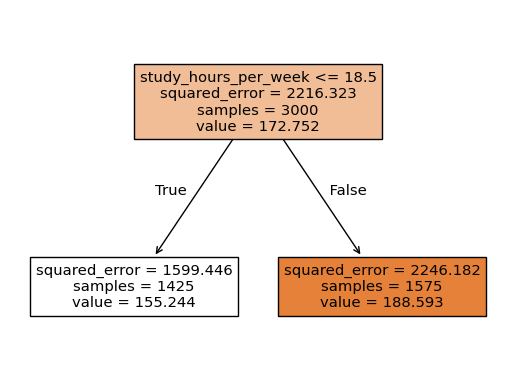

In [16]:
# display the tree
tree.plot_tree(model_q1, feature_names=dv.get_feature_names_out(), filled=True)

From the tree, we can see that the model uses the feature `study_hours_per_week` for splitting the data.
The threshold it uses is `18.5` hours.

## Question 2

In [17]:
# initialize a new model for question 2
model_q2 = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# fit the model
model_q2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [18]:
# get predictions on val data
y_pred_q2 = model_q2.predict(X_val)

In [19]:
# calculate RMSE on the val data
rmse_val_q2 = root_mean_squared_error(y_val, y_pred_q2)
# display the RMSE rounded to three digits
round(rmse_val_q2, 2)


np.float64(42.14)

The RMSE of this model on the validation data rounded to two digits is `42.14`.

## Question 3

In [20]:
# function for training a rf regressor and evaluating it using RMSE as metric
def train_evaluate_rf(n_estimators, X_t=X_train, y_t=y_train, X_v=X_val, y_v=y_val):

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  random_state=1,
                                  n_jobs=-1)
    model.fit(X_t, y_t)
    y_p = model.predict(X_v)
    rmse = root_mean_squared_error(y_v, y_p)
    rmse = round(rmse, 3)
    
    return rmse

In [21]:
# make sequence in numpy 
n_estimators = np.arange(10, 201, 10)

# make pandas data frame from it
rmse_val_q3 = pd.DataFrame(n_estimators, columns=["n_estimators"])

# apply the function to the sequence
rmse_val_q3["rmse"] = rmse_val_q3["n_estimators"].apply(train_evaluate_rf)

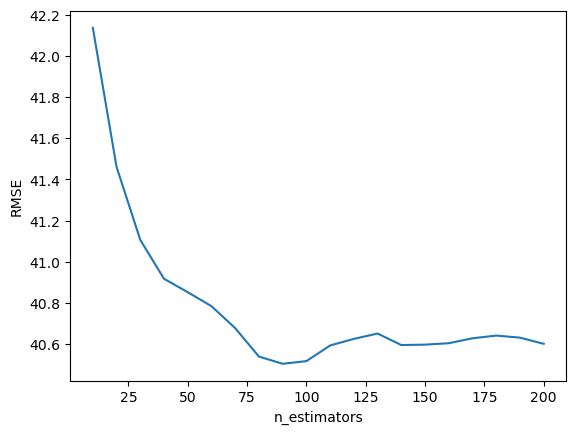

In [22]:
# plot result
plt.plot(rmse_val_q3["n_estimators"], rmse_val_q3["rmse"])
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.show()


In [23]:
# get min RMSE and corresponding n_estimators
rmse_val_q3[rmse_val_q3["rmse"] == rmse_val_q3["rmse"].min()]

,n_estimators,rmse
8,90,40.504


Here, the model reaches a minimum RMSE when `90` estimators are being used.
The closest choice is `80`.

## Question 4

In [24]:
# function for training and evaluating the rf regressor
# difference to previous version: accepts a row of a pandas data frame
def train_evaluate_rf_row(row, X_t=X_train, y_t=y_train, X_v=X_val, y_v=y_val):
    n_estimators = row['n_estimators']
    max_depth = row['max_depth']
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                max_depth=max_depth,
                                random_state=1,
                                n_jobs=-1)
    model.fit(X_t, y_t)
    y_p = model.predict(X_v)
    rmse = root_mean_squared_error(y_v, y_p)
    return round(rmse, 3)

In [25]:
# get parameter grid for iterating through
data_q4 = {
    "max_depth": np.repeat([10, 15, 20, 25], 20),
    "n_estimators": np.tile(np.arange(10, 201, 10), 4)
}

# make a pandas data frame from the parameter grid
results_q4 = pd.DataFrame(data_q4)

# display the data frame
results_q4

,max_depth,n_estimators
0,10,10
1,10,20
2,10,30
3,10,40
4,10,50
...,...,...
75,25,160
76,25,170
77,25,180
78,25,190


In [26]:
# apply the function to the sequence
results_q4["rmse"] = results_q4[["max_depth", "n_estimators"]].apply(train_evaluate_rf_row, axis=1)

In [27]:
# pivot the data to wide format
results_q4 = results_q4.pivot(
    index="n_estimators",
    columns="max_depth",
    values="rmse"
)

<Axes: xlabel='max_depth', ylabel='n_estimators'>

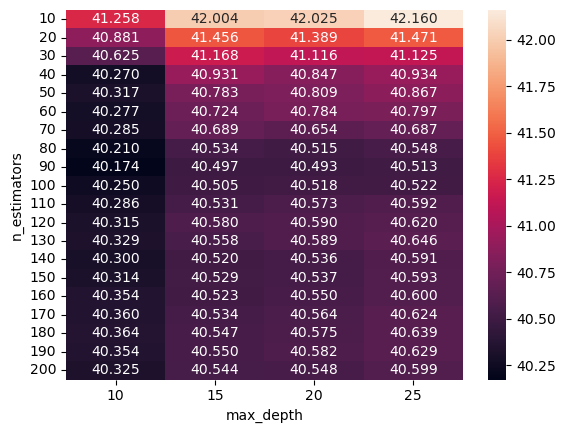

In [28]:
sns.heatmap(results_q4, annot=True, fmt=".3f")

In [29]:
# get mean RMSE for each max_depth
results_q4.aggregate("mean")


max_depth
10    40.39240
15    40.73535
20    40.73970
25    40.78785
dtype: float64

The `max_depth` 10 has the best RMSE on average.
It also has the best individual value, when `n_estimators` is set to `90`.

## Question 5

In [30]:
# define new model according to exercise
model_q5 = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

In [31]:
# train model
model_q5.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [32]:
# get feature importance from this model
feature_importances_q5 = model_q5.feature_importances_
# make a pandas series from it
feature_importances_q5 = pd.Series(feature_importances_q5, index=dv.get_feature_names_out())
# sort the series by the feature importance 
feature_importances_q5 = feature_importances_q5.sort_values(ascending=False)

feature_importances_q5

study_hours_per_week                0.248354
attendance_rate                     0.149729
distance_to_school                  0.136486
teacher_quality                     0.082682
age                                 0.069311
assignments_completed               0.031517
socioeconomic_status=High           0.025714
parent_involvement=High             0.022919
it_knowledge=High                   0.017719
parent_education_level=Secondary    0.016957
parent_education_level=Primary      0.015450
parent_education_level=Tertiary     0.014489
extra_tutorials=No                  0.013459
parent_involvement=Low              0.013358
it_knowledge=Low                    0.012404
access_to_learning_materials=No     0.012325
parent_involvement=Medium           0.011492
socioeconomic_status=Low            0.010708
socioeconomic_status=Medium         0.010563
gender=Male                         0.010383
access_to_learning_materials=Yes    0.010262
school_location=Rural               0.009559
gender=Fem

The most important feature is still `study_hours_per_week`.
The four choises from the multiple-choice question are the four most important
features in the order they are given in the question.

## Question 6

### For `eta = 0.3`

In [53]:
# get feature names
features = list(dv.get_feature_names_out())

# make DMatrix for training and validation data
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


In [54]:
# create watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [55]:
# define parameters for the model
xgb_params_03 = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [56]:
# create dictionary to store results
evals_result_03 = {}

# train model and capture metrics
model_q6_03 = xgb.train(
    params=xgb_params_03,
    dtrain=dtrain,
    num_boost_round=100,
    evals=watchlist,
    evals_result=evals_result
)

[0]	train-rmse:42.69552	val-rmse:44.86028
[1]	train-rmse:39.85005	val-rmse:43.06070
[2]	train-rmse:37.95285	val-rmse:41.83772
[3]	train-rmse:36.52203	val-rmse:41.26987
[4]	train-rmse:35.36066	val-rmse:41.02965
[5]	train-rmse:34.43646	val-rmse:40.87186
[6]	train-rmse:33.71528	val-rmse:40.69132
[7]	train-rmse:33.07449	val-rmse:40.65074
[8]	train-rmse:32.41772	val-rmse:40.72710
[9]	train-rmse:31.91000	val-rmse:40.82972
[10]	train-rmse:31.55119	val-rmse:40.83684
[11]	train-rmse:30.99534	val-rmse:40.98243
[12]	train-rmse:30.33163	val-rmse:41.05515
[13]	train-rmse:30.04347	val-rmse:41.18635
[14]	train-rmse:29.44279	val-rmse:41.32160
[15]	train-rmse:29.08791	val-rmse:41.37832
[16]	train-rmse:28.84106	val-rmse:41.45737
[17]	train-rmse:28.28883	val-rmse:41.51113
[18]	train-rmse:27.90071	val-rmse:41.55139
[19]	train-rmse:27.60694	val-rmse:41.66496
[20]	train-rmse:27.24424	val-rmse:41.80313
[21]	train-rmse:26.79013	val-rmse:41.88767
[22]	train-rmse:26.64232	val-rmse:41.90488
[23]	train-rmse:26.31

In [57]:
# convert to DataFrame
results_df_03 = pd.DataFrame({
    'train': evals_result['train']['rmse'],
    'val': evals_result['val']['rmse']
})

# display the data frame
results_df_03

,train,val
0,42.695520,44.860280
1,39.850047,43.060702
2,37.952846,41.837722
3,36.522035,41.269874
4,35.360657,41.029646
...,...,...
95,12.054643,44.312101
96,11.831293,44.356560
97,11.699295,44.407212
98,11.598889,44.425821


Text(0, 0.5, 'RMSE')

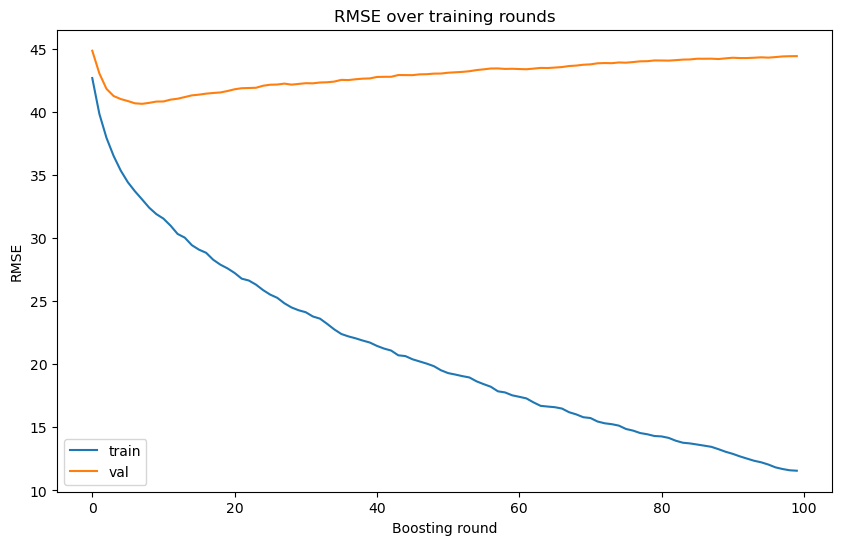

In [58]:
# plot the results
results_df_03.plot(title='RMSE over training rounds', figsize=(10, 6))
plt.xlabel('Boosting round')
plt.ylabel('RMSE')

### For `eta = 0.1`

In [59]:
# define parameters for the model
xgb_params_01 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [60]:
# create dictionary to store results
evals_result_01 = {}

# train model and capture metrics
model_q6_01 = xgb.train(
    params=xgb_params_01,
    dtrain=dtrain,
    num_boost_round=100,
    evals=watchlist,
    evals_result=evals_result
)

# convert to DataFrame
results_df_01 = pd.DataFrame({
    'train': evals_result['train']['rmse'],
    'val': evals_result['val']['rmse']
})

[0]	train-rmse:45.50072	val-rmse:46.99373
[1]	train-rmse:44.12583	val-rmse:45.89771
[2]	train-rmse:42.92815	val-rmse:45.01746
[3]	train-rmse:41.90445	val-rmse:44.27569
[4]	train-rmse:40.94238	val-rmse:43.62411
[5]	train-rmse:40.15460	val-rmse:43.05644
[6]	train-rmse:39.43451	val-rmse:42.64605
[7]	train-rmse:38.77902	val-rmse:42.28889
[8]	train-rmse:38.17103	val-rmse:42.00035
[9]	train-rmse:37.60436	val-rmse:41.73633
[10]	train-rmse:37.11353	val-rmse:41.55631
[11]	train-rmse:36.65501	val-rmse:41.33670
[12]	train-rmse:36.26337	val-rmse:41.18307
[13]	train-rmse:35.84634	val-rmse:41.03057
[14]	train-rmse:35.45796	val-rmse:40.89024
[15]	train-rmse:35.07766	val-rmse:40.70892
[16]	train-rmse:34.73181	val-rmse:40.60601
[17]	train-rmse:34.40922	val-rmse:40.47982
[18]	train-rmse:34.13466	val-rmse:40.43780
[19]	train-rmse:33.88018	val-rmse:40.38390
[20]	train-rmse:33.57997	val-rmse:40.37859
[21]	train-rmse:33.33993	val-rmse:40.33974
[22]	train-rmse:33.08144	val-rmse:40.31700
[23]	train-rmse:32.90

### Compare results

In [63]:
# get min RMSE on val set it eta = 0.3
results_df_03["val"].min()

np.float64(40.65073717967871)

In [64]:
# get min RMSE on val set it eta = 0.1
results_df_01["val"].min()

np.float64(40.11076087632939)

While the results are close, the best RMSE is reached when `eta = 0.1`.